<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/05_Pet_Breeds/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 204kB 13.6MB/s 
     |████████████████████████████████| 1.2MB 14.5MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 


In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/'images').ls()[0]

Path('images/shiba_inu_79.jpg')

In [ ]:
fname = (path/'images').ls()[0]
fname

Path('images/shiba_inu_79.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg',fname.name)

['shiba_inu']

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

#BASELINE

In [8]:
#Baseline
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(21)

epoch,train_loss,valid_loss,error_rate,time
0,1.457404,0.313791,0.100812,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.447311,0.258424,0.079838,01:10
1,0.332303,0.242307,0.076455,01:11
2,0.276141,0.271085,0.087280,01:11
3,0.265817,0.289270,0.091340,01:11
4,0.238389,0.297061,0.085927,01:11
5,0.209096,0.329860,0.092016,01:11
6,0.197988,0.315809,0.100812,01:12
7,0.157938,0.285131,0.080514,01:11
8,0.154189,0.288824,0.083897,01:11
9,0.118407,0.327545,0.075101,01:12


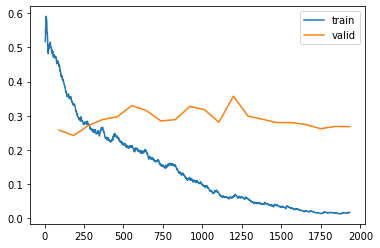

In [9]:
learn.recorder.plot_loss()

#LR Search

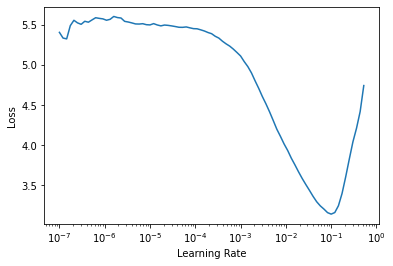

In [ ]:
#Find a good lr and train again
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
#Min is (lr for smallest loss)/ and steep the point the one with higher gradient
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [ ]:
#Take a lr smaller than steepest
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(11, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.256881,0.366213,0.111637,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.525439,0.420047,0.127199,01:12
1,0.310600,0.265762,0.085927,01:12


In [ ]:
learn.recorder.plot_loss()

#Unfreeze

In [ ]:
#We have calculated best lr with the old layers of resnet34 freeze
#but fine_tune train once with the layers freezed and the num of epochs unfreeze
#Lets calculate new lr

In [ ]:
#First one cycle before we unfreeze
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(11, lr_max=1e-5)

In [ ]:
learn.recorder.plot()

#Discriminative LR

In [ ]:
#When a slice of lr is passed to a learner takes the first for the first layer
#and the last for the las. The ones in between will take values multiplicatively equidistant

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [ ]:
learn.recorder.plot_loss()